In [1]:
from yolo import YOLO
from utils import get_annotations_images, LabelEncoder, read_labels
from config import Config
from networkfactory import NetworkFactory
from tensorflow.keras.optimizers import Adam

In [2]:
annotation_folder = '.\VOCdevkit\VOC2007\Annotations'
images_folder = '.\VOCdevkit\VOC2007\JPEGImages'

annotations, images = get_annotations_images(annotation_folder, images_folder)
images = images[1:2]

In [3]:
labels_dir = "./labels.txt"
cfg_path = r"C:\Users\Gencho\Desktop\ObjectDetection\experiments\mobilenetyolov2-voc.cfg"
weights = r'./weights/trained02'

cfg = Config(cfg_path)
encoder = LabelEncoder(read_labels(labels_dir)[0])
networkfactory = NetworkFactory()

yolo = YOLO(cfg, encoder, networkfactory, weights)

C:\Users\Gencho\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
W0107 00:53:04.134621 13920 deprecation.py:506] From C:\Users\Gencho\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0107 00:54:02.715630 13920 deprecation.py:323] From C:\Users\Gencho\Desktop\ObjectDetection\experiments\yolo.py:115: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0107 00:54:02.781627 13920 depre

accepted: 1, rejected: 844


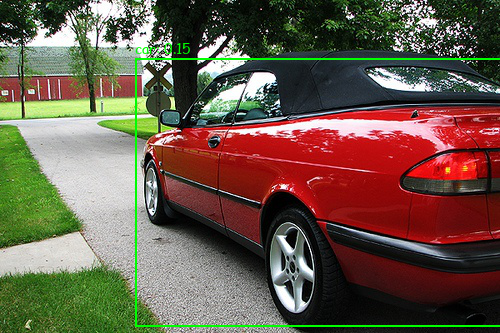

car (0.1453333026563921) (135.19230255713828, 58.53114993755634) (518.6538512890155, 325.6996192932129)


In [4]:
for image in images:
    objs = yolo.feed_forward(image, draw = True, supression="regular")
    for obj in objs:
        print(obj)

accepted: 1, rejected: 844


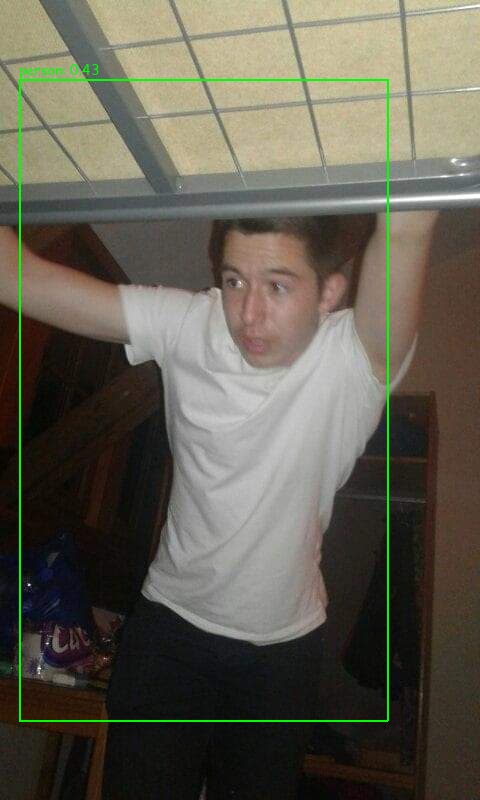

In [5]:
afk = r"./mytestimages/marian.jpg"
objs = yolo.feed_forward(afk, draw = True, supression="none", save_image = True)